In [1]:

import glob as glob                                            # grabbing file names
import pandas as pd                                            # making dataframe for exporting parameters
import numpy as np                                             # basic math
import skimage.io as io                                        # reading in images
import os
import trackpy as tp             # particle tracking toolbox
%matplotlib widget
import matplotlib.pyplot as plt  # for plotting everything
from matplotlib import cm, colors
from tcell_migration import *
import subprocess                                  # for executing commands from the terminal


/var/folders/qh/qtnhpk3n0wz437fnzt3vhrw00000gp/T/ipykernel_92697/343926677.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                            # making dataframe for exporting parameters


# Parameters

In [2]:
feature_size = 11
minmass = 2500
separation = 3
max_search_range = 8
num_skipped_frames = 0
min_track_length = 5
frame_duration = 15
um_per_pixel = 1.1
max_colormap = 0.4

In [3]:
# filename = 'Position_5.tif'
filename = 'github_test/position_1/Position_1.tif'


In [4]:
#read in the imsage stack
imstack = io.imread(filename)


In [5]:
make_movie_of_raw_data(imstack, filename, min_inten=88, max_inten=563)

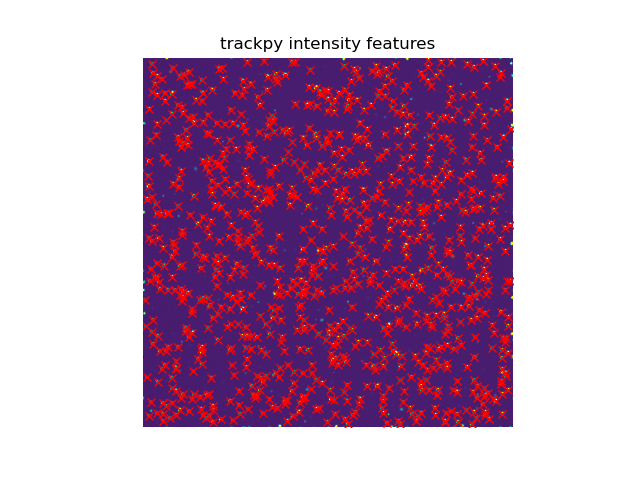

In [6]:
check_peak_locations(imstack, frame_num=50, im_min_inten=80, im_max_inten=350)

Frame 80: 978 features


/Users/poakes/anaconda3/envs/tfm/lib/python3.9/site-packages/trackpy/plots.py:638: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  axlist = f[pos_columns].applymap(lambda x: x % 1).hist()


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

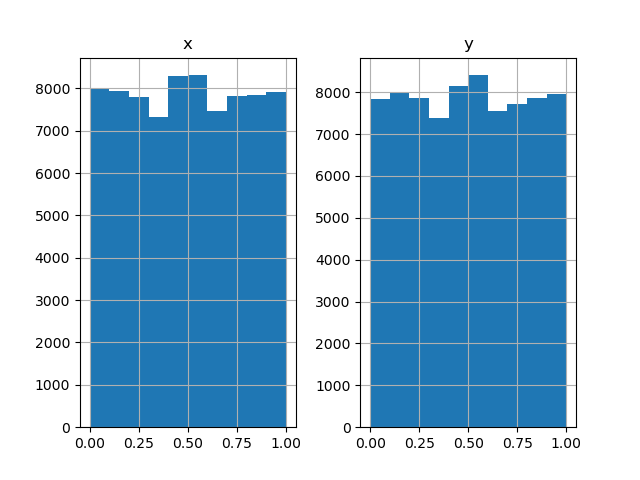

In [7]:
# find the peaks
all_cells = tp.batch(imstack[:], feature_size, minmass=minmass, separation = separation)

# check whether subpixel accuracy is decent. Should be relatively flat distribution
tp.subpx_bias(all_cells)

In [8]:
# save the particle dataframe
all_cells.to_hdf(filename[:-4] + '_points.h5', key='t_cells', mode='w')

In [9]:
# link tracks
cell_tracks = tp.link_df(all_cells, search_range=max_search_range, adaptive_stop = 5, memory=num_skipped_frames)
# filter based on minimum length
cell_tracks_filtered = tp.filter_stubs(cell_tracks, min_track_length)


Frame 80: 978 trajectories present.


In [10]:
cell_trackdata_df = calculate_track_parameters(cell_tracks_filtered, filename=filename, frame_duration=frame_duration, um_per_pixel=um_per_pixel)

/Users/poakes/Documents/GitHub/tcell_migration/tcell_migration.py:103: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['x', 'y', 'velocity', 'frames'], dtype='object')]

  cell_trackdata_df.to_hdf(filename[:-4] + '_trackdata.h5', key='tracks', mode='w')


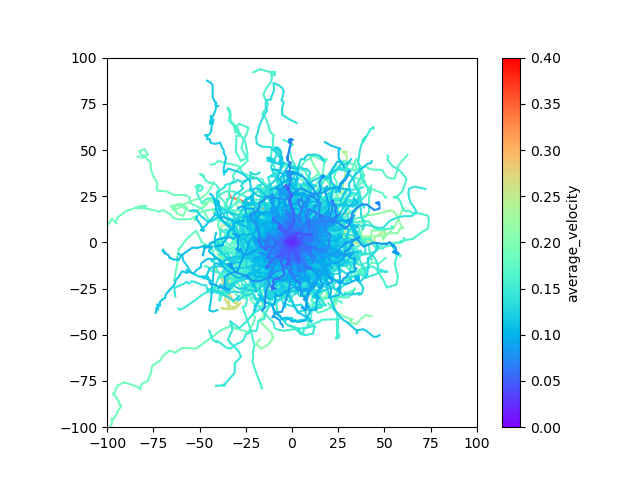

In [11]:
plot_roseplot(cell_trackdata_df, filename, um_per_pixel, color_hue = 'average_velocity',max_colormap=max_colormap , xlimits=100, ylimits=100)

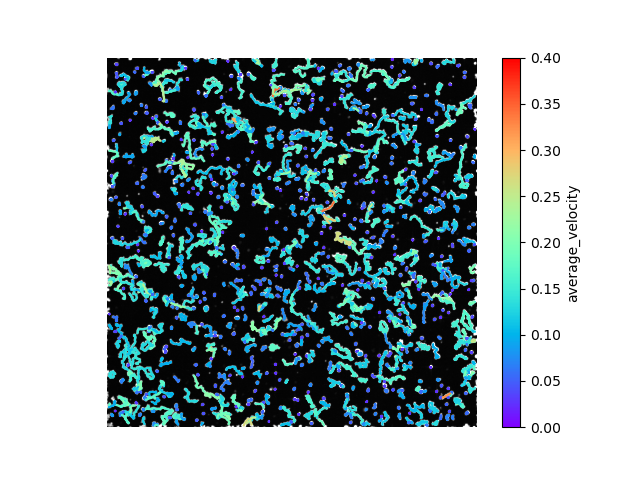

In [12]:
# plot tracks all the same color
# plot_track_overlays(imstack, cell_trackdata_df)

# plot tracks according to a dimension in the dataframe
plot_track_overlays(imstack, cell_trackdata_df, filename = filename, color_hue='average_velocity',max_colormap=max_colormap)


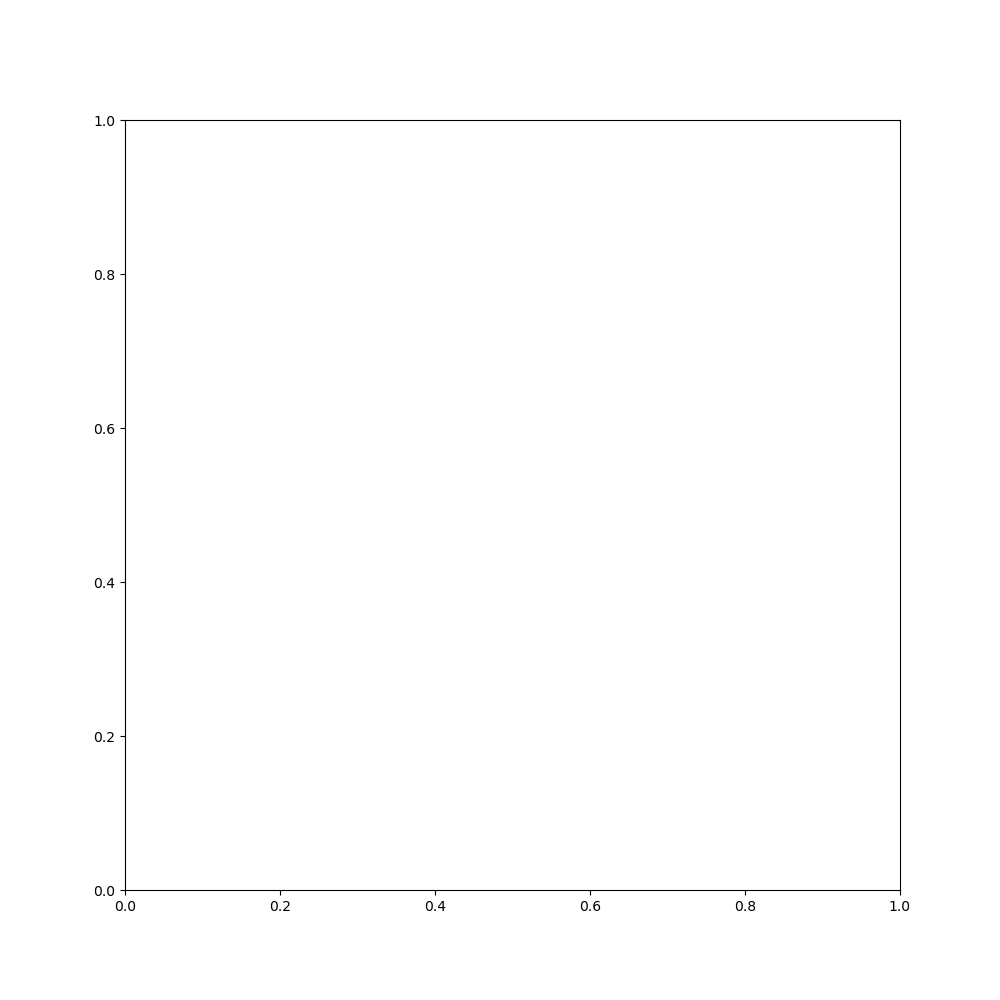

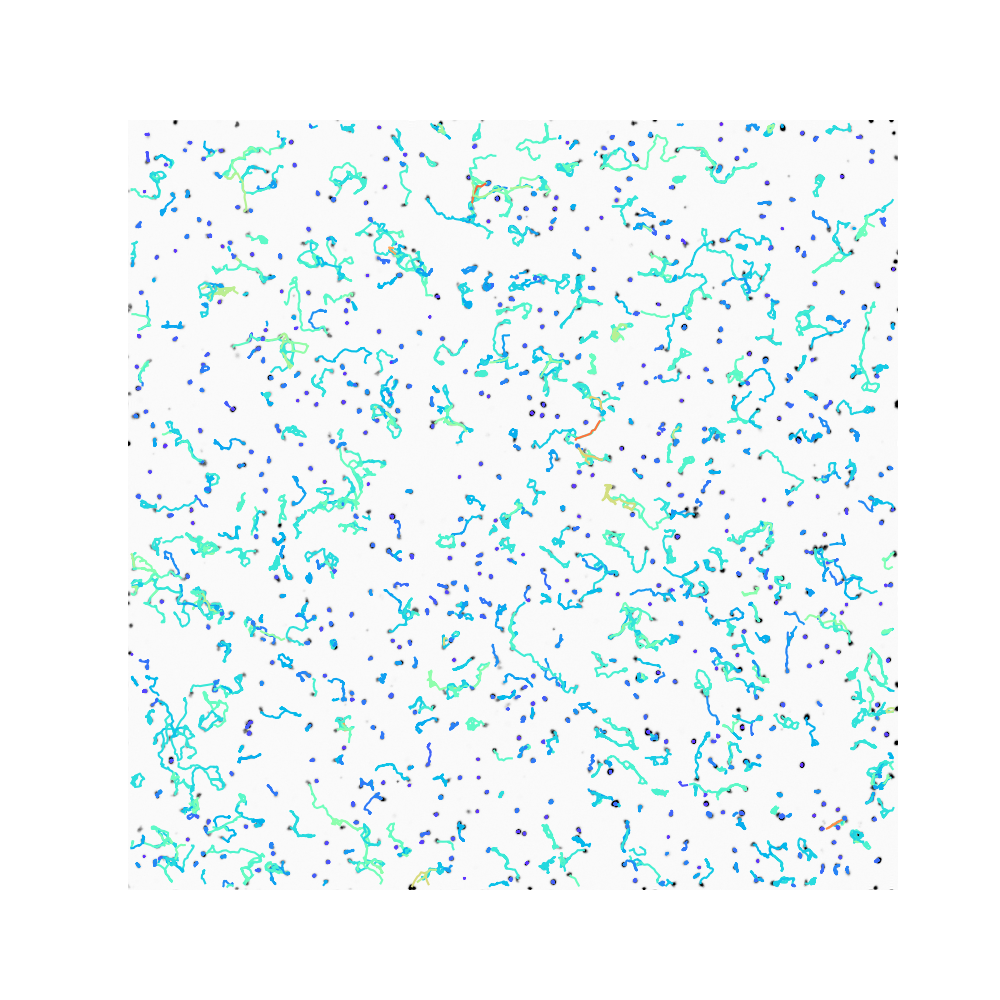

In [13]:
make_movie_with_overlays(filename, imstack, cell_trackdata_df, im_min_inten=80, im_max_inten=585, color_hue='average_velocity',max_colormap=max_colormap)